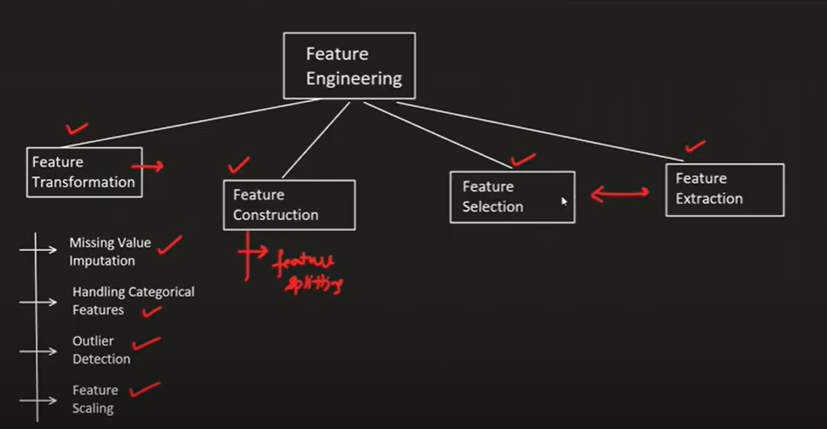

In [85]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns

In [86]:
df = pd.read_csv('train.csv')[['Age','Pclass','SibSp','Parch','Survived']]

In [87]:
df.head()

,Age,Pclass,SibSp,Parch,Survived
0,22.0,3,1,0,0
1,38.0,1,1,0,1
2,26.0,3,0,0,1
3,35.0,1,1,0,1
4,35.0,3,0,0,0


In [88]:
df.dropna(inplace=True)

In [89]:
df.head()

,Age,Pclass,SibSp,Parch,Survived
0,22.0,3,1,0,0
1,38.0,1,1,0,1
2,26.0,3,0,0,1
3,35.0,1,1,0,1
4,35.0,3,0,0,0


In [90]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [91]:
X.head()

,Age,Pclass,SibSp,Parch
0,22.0,3,1,0
1,38.0,1,1,0
2,26.0,3,0,0
3,35.0,1,1,0
4,35.0,3,0,0


In [92]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

0.6933333333333332

## Applying Feature Construction

In [93]:
X['Family_size'] = X['SibSp'] + X['Parch'] + 1

In [94]:
X.head()

,Age,Pclass,SibSp,Parch,Family_size
0,22.0,3,1,0,2
1,38.0,1,1,0,2
2,26.0,3,0,0,1
3,35.0,1,1,0,2
4,35.0,3,0,0,1


In [61]:
def myfunc(num):
    if num == 1:
        #alone
        return 0
    elif num >1 and num <=4:
        # small family
        return 1
    else:
        # large family
        return 2

In [62]:
myfunc(4)

1

In [95]:
X['Family_type'] = X['Family_size'].apply(myfunc)

In [96]:
X.head()

,Age,Pclass,SibSp,Parch,Family_size,Family_type
0,22.0,3,1,0,2,1
1,38.0,1,1,0,2,1
2,26.0,3,0,0,1,0
3,35.0,1,1,0,2,1
4,35.0,3,0,0,1,0


In [97]:
X.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [98]:
X.head()

,Age,Pclass,Family_type
0,22.0,3,1
1,38.0,1,1
2,26.0,3,0
3,35.0,1,1
4,35.0,3,0


In [99]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

0.7003174603174602

## Feature Splitting

In [100]:
df = pd.read_csv('train.csv')

In [101]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [108]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [106]:
df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: 0, Length: 891, dtype: object

In [109]:
df[['Title','Name']]

,Title,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"
...,...,...
886,Rev,"Montvila, Rev. Juozas"
887,Miss,"Graham, Miss. Margaret Edith"
888,Miss,"Johnston, Miss. Catherine Helen ""Carrie"""
889,Mr,"Behr, Mr. Karl Howell"


In [110]:
(df.groupby('Title').mean()['Survived']).sort_values(ascending=False)

Title
the Countess    1.000000
Mlle            1.000000
Lady            1.000000
Ms              1.000000
Sir             1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Major           0.500000
Col             0.500000
Dr              0.428571
Mr              0.156673
Rev             0.000000
Jonkheer        0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64

In [111]:
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1

C:\Users\91842\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [112]:
df['Is_Married']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Is_Married, Length: 891, dtype: int64